# Case Study - Titanic

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


In [3]:
# check for missing vakues
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# # Fill in the missing values for the cabin and emabrked
df_titanic[['Cabin', 'Embarked']] =\
df_titanic[['Cabin', 'Embarked']].fillna\
(value={'Cabin': 'Uknown', 'Embarked': 'Uknown'})

# # fill in the missing values for age
df_titanic['Age'] = df_titanic['Age'].fillna(method='ffill')

In [5]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<div style="font-family: Georgia;">
    There were:<br>
    - 687 missing values in the cabin column<br>
    - 177 missing values in the Age column<br>
    - 2 Missing values in Embarked column
</div>


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


<div style="font-family: Georgia";>
There are 891 observations of passeger ID<br>



##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [7]:
# Remove the $ from the fare column and convert the column to a float
df_titanic['Fare'] = df_titanic['Fare'].astype(str).replace('\$', '', regex=True).astype(float)
print(df_titanic['Fare'].head(2))


0     7.2500
1    71.2833
Name: Fare, dtype: float64


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [8]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


<div style="font-family: Georgia";>
-The average age for all on board was 29.6 Years with maximum age being 80 and minimum 0.42<br>
-An average of 0.52 passengers had siblings on board<br>
-The average fare was 32.2 dollars with the minimum fare being 0 dollars and the maximum being 512.3 dollars
</div>

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

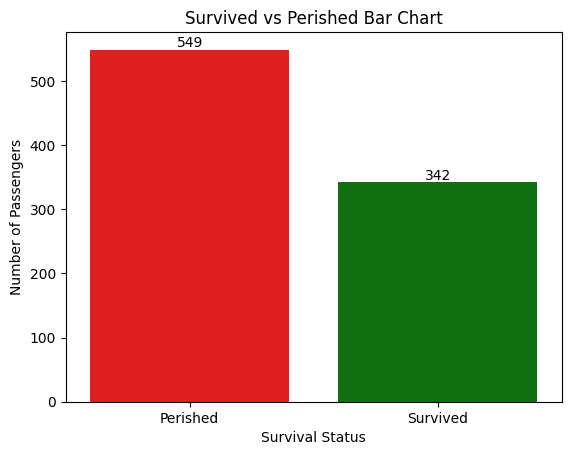

In [9]:
# barchart of survival vs perished
df_titanic.head(2)
survived=(df_titanic['Survived']==1).sum()
perished=(df_titanic['Survived']==0).sum()
data=[survived,perished]
data_survival= pd.DataFrame(data={'Number of Passengers': [perished, survived]}, index=['Perished', 'Survived'])
sns.barplot(data=data_survival['Number of Passengers'],palette={'Perished':'red','Survived':'green'})
plt.xlabel('Survival Status')
plt.title('Survived vs Perished Bar Chart')
for index, value in enumerate(data_survival['Number of Passengers']):
    plt.text(index,value, str(value),ha='center',va='bottom')

OBSERVATION:
<br>
- 549 people perished while 342 survived

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

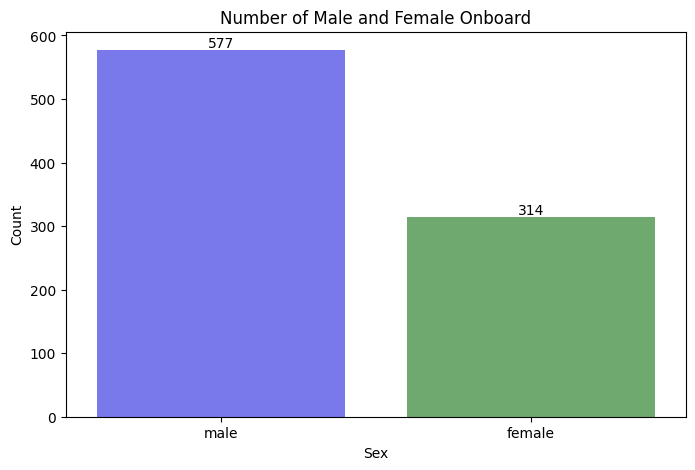

In [11]:
# Bar chat for number of male and female passengers onboard
male_count = (df_titanic['Sex'] == 'male').sum()
female_count = (df_titanic['Sex'] == 'female').sum()
data_sex = {'Sex': ['male', 'female'], 'Count': [male_count, female_count]}
df_sex_plot = pd.DataFrame(data_sex)
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Count', data=df_sex_plot, hue='Sex', palette={'male':'blue','female':'green'}, alpha=0.6)
plt.title('Number of Male and Female Onboard')
for index, value in enumerate(df_sex_plot['Count']):
    plt.text(index,value, str(value),ha='center',va='bottom')
plt.show()

OBSERVATION:
<br>
- There were more males (577) compared to females (314).

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

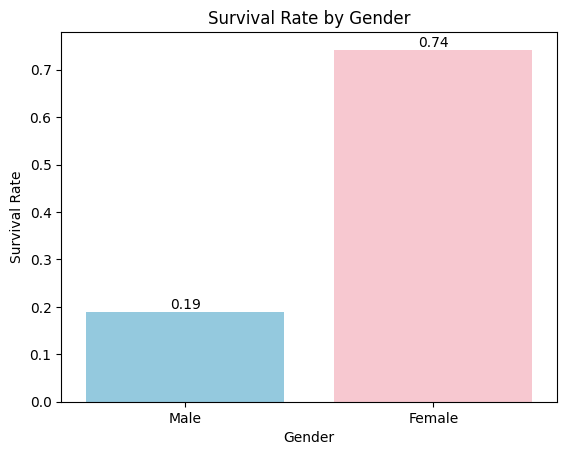

        Survival Rate
Male         0.188908
Female       0.742038


In [12]:
male_survivors = ((df_titanic['Sex'] == 'male') & (df_titanic['Survived'] == 1)).sum()
female_survivors = ((df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 1)).sum()
 
# Calculate the total number of male and female passengers
total_male = (df_titanic['Sex'] == 'male').sum()
total_female = (df_titanic['Sex'] == 'female').sum()
 
# Calculate survival rates
male_survival_rate = male_survivors / total_male
female_survival_rate = female_survivors / total_female
 
# Create a DataFrame with survival rates
survival_rate_df = pd.DataFrame({'Survival Rate': [male_survival_rate, female_survival_rate]},
                                index=['Male', 'Female'])
 
# Plotting with Seaborn
sns.barplot(x=survival_rate_df.index, y='Survival Rate', data=survival_rate_df, palette={'Male':'skyblue', 'Female':'pink'})
 
# Add data labels above each bar
for index, value in enumerate(survival_rate_df['Survival Rate']):
    plt.text(index, value, f'{value:.2f}', va='bottom', ha='center')
 
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.title('Survival Rate by Gender')
plt.show()
 
print(survival_rate_df)

OBSERVATION:
<br>
- 74% of females survived compared to 19% for males. Indicating a higher survival rate of females.

##### Task7: Plot Perished vs. Survived Bar for Male and Female
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

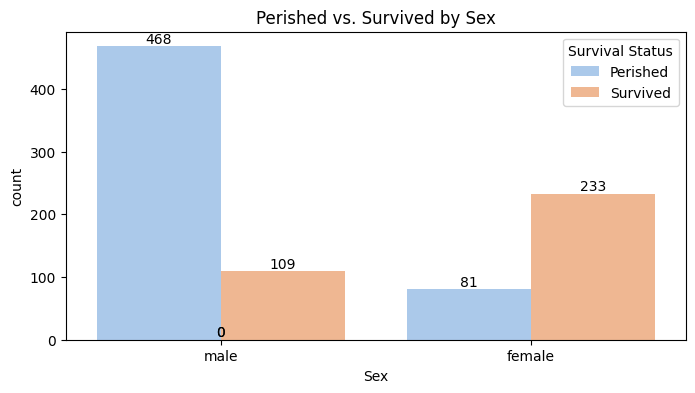

<Figure size 800x200 with 0 Axes>

In [13]:
# countplot for perished vs survived per gender
df_titanic['Survival Status'] = df_titanic['Survived'].map({0: 'Perished', 1: 'Survived'})
plt.figure(figsize=(8, 4))
ax=sns.countplot(x='Sex', hue='Survival Status', data=df_titanic, palette='pastel')
plt.title('Perished vs. Survived by Sex')
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', color='black')
plt.figure(figsize=(8, 2))
plt.show()

OBSERVATION:
<br>
- The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [14]:
# Survival rate per calss
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean().reset_index()
print(survival_rate_by_pclass)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


##### Task 9: Plot Perished vs. Survived for each Pclass

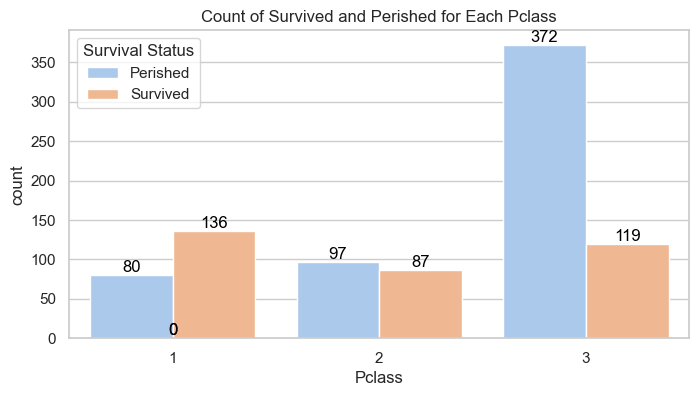

In [15]:
# Number of of survivors and perished for each Pclass
survived_per_class = df_titanic.groupby(['Pclass', 'Survived']).size().unstack().reset_index()
survived_per_class.columns = ['Pclass', 'Perished', 'Survived']
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
bx=sns.countplot(x='Pclass', hue='Survived', data=df_titanic, palette='pastel')
legend_labels = {0: 'Perished', 1: 'Survived'}
plt.legend(title='Survival Status', labels=[legend_labels[label] for label in sorted(legend_labels)])
plt.title('Count of Survived and Perished for Each Pclass')
for bar in bx.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', color='black')
plt.show()

OBSERVATION:
<br>
- The majority of people that perished were in the Pclass 3.
- More people in the first class survived compared to those who perished.

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

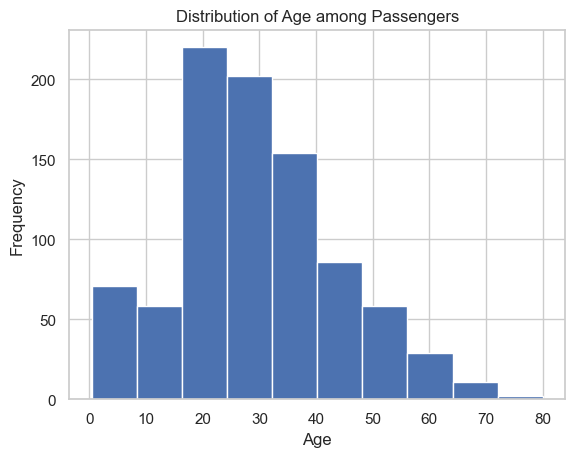

In [16]:
# Histogram for age for passengers onboard
df_titanic['Age'].plot.hist()
plt.xlabel('Age')
plt.title('Distribution of Age among Passengers')
plt.show()

OBSERVATION
<br>
- Majority of passengers were between ages 20 and 50, with the highest being in the 20's.
- Passengers above the age of 60 were the least.
- Among the children, the majority were below 10 years (numbering about 70)

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

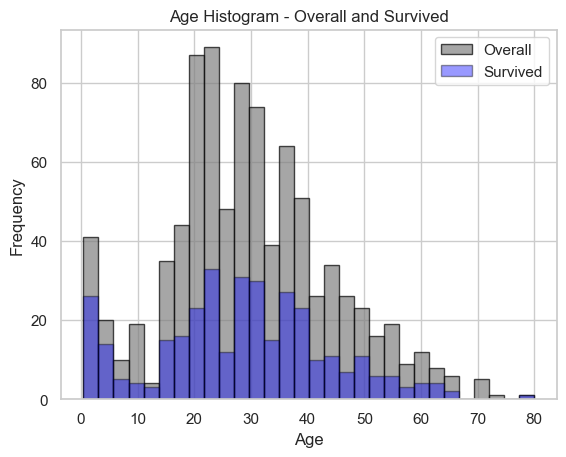

In [17]:
plt.hist(df_titanic['Age'], bins=30, alpha=0.7, label='Overall', color='grey', edgecolor='black')

# Age histogram for survived passengers
plt.hist(df_titanic[df_titanic['Survived'] == 1]['Age'], bins=30, alpha=0.4, label='Survived', color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram - Overall and Survived')
plt.legend()

# Show the plot
plt.show()

OBSERVATION:
<br>
- The passengers who survived vs those who died had similar distribution across the age groups

[Back to Top](#Table-of-Contents)
